In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

harris_p1 = pd.read_csv('data/Option 1/HarrisPartI.csv')
harris_p2 = pd.read_csv('data/Option 1/HarrisPartII.csv')
harris_p3 = pd.read_csv('data/Option 1/HarrisPartIII.csv')
vandenberg = pd.read_csv('data/Option 1/vandenBerg_table2.csv')
krause = pd.read_csv('data/Option 1/Krause21.csv')

In [2]:
harris_p1.rename(columns={'ID':"Object"},inplace = True)
harris_p1['Object'] = harris_p1['Object'].astype(str)
harris_p1['Object']= harris_p1['Object'].str.replace(r' ', '', regex=True)


harris_p1.head()

,Object,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,Z
0,NGC104,47 Tuc,00:24:05.67,-72:04:52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
1,NGC288,NaN,00:52:45.24,-26:34:57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9
2,NGC362,NaN,01:03:14.26,-70:50:55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
3,Whiting1,NaN,02:02:57,-03:15:10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
4,NGC1261,NaN,03:12:16.21,-55:12:58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9


In [3]:
harris_p2.rename(columns={'ID':"Object", '[Fe/H]':'FeH'},inplace = True)
harris_p2['Object'] = harris_p2['Object'].astype(str)
harris_p2['Object']= harris_p2['Object'].str.replace(r' ', '', regex=True)

harris_p2['FeH'] = pd.to_numeric(harris_p2['FeH'], errors='coerce')

harris_p2.head()


,Object,FeH,wt,E(B-V),V_HB,(m-M)V,V_t,"M_V,t",U-B,B-V,V-R,V-I,spt,ellip
0,NGC104,-0.72,10,0.04,14.06,13.37,3.95,-9.42,0.37,0.88,0.53,1.14,G4,0.09
1,NGC288,-1.32,3,0.03,15.44,14.84,8.09,-6.75,0.08,0.65,0.45,0.94,,
2,NGC362,-1.26,5,0.05,15.44,14.83,6.4,-8.43,0.16,0.77,0.49,1.01,F9,0.01
3,Whiting1,-0.70,1,0.03,18.18,17.49,15.03,-2.46,,,,,,
4,NGC1261,-1.27,3,0.01,16.70,16.09,8.29,-7.8,0.13,0.72,0.45,0.93,F7,0.07


In [4]:
krause['FeH'] = pd.to_numeric(krause['FeH'], errors='coerce')
krause['Age'] = pd.to_numeric(krause['Age'], errors='coerce')
krause.head()


,Class,Object,AltName,Mstar,rh,C5,Age,FeH
0,GC,NGC104,47Tuc,6.46,7.10,0.92,12.80,-0.76
1,GC,NGC288,Melotte3,0.46,9.80,0.05,12.20,-1.32
2,GC,NGC362,Dunlop62,2.50,3.50,0.72,10.00,-1.26
3,GC,NGC1261,Caldwell87,3.41,5.50,0.62,10.24,-1.08
4,GC,NGC1851,Dunlop508,5.51,3.05,1.81,7.64,-1.13


In [5]:
def add_NGC(s):
    return "NGC" + s

vandenberg['#NGC'] = vandenberg['#NGC'].apply(add_NGC)
vandenberg.rename(columns = {'#NGC':'Object'}, inplace = True)
vandenberg['FeH'] = pd.to_numeric(vandenberg['FeH'], errors='coerce')
vandenberg['Age'] = pd.to_numeric(vandenberg['Age'], errors='coerce')

vandenberg.head()

,Object,Name,FeH,Age,Age_err,Method,Figs,Range,HBtype,R_G,M_V,v_e0,log_sigma_0
0,NGC104,47Tuc,-0.76,11.75,0.25,V,14,11.50–11.75,-0.99,7.4,-9.42,54.8,5.061
1,NGC288,XXXX,-1.32,11.50,0.38,H,24,NaN,0.98,12.0,-6.75,10.9,2.953
2,NGC362,XXXX,-1.30,10.75,0.25,V,13,10.75–11.00,-0.87,9.4,-8.43,44.4,4.938
3,NGC1261,XXXX,-1.27,10.75,0.25,V,13,10.75–11.25,-0.71,18.1,-7.80,23.6,3.913
4,NGC1851,XXXX,-1.18,11.00,0.25,V,13,10.75–11.25,-0.32,16.6,-8.33,47.6,5.136


In [6]:
merged_metalicities = pd.merge(vandenberg,krause, on ='Object')
merged_metalicities = pd.merge(merged_metalicities,harris_p2, on ='Object')
merged_metalicities = pd.merge(merged_metalicities,harris_p1, on ='Object')




In [7]:
merged_metalicities.columns

Index(['Object', 'Name_x', 'FeH_x', 'Age_x', 'Age_err', 'Method', 'Figs',
       'Range', 'HBtype', 'R_G', 'M_V', 'v_e0', 'log_sigma_0', 'Class',
       'AltName', 'Mstar', 'rh', 'C5', 'Age_y', 'FeH_y', 'FeH', 'wt', 'E(B-V)',
       'V_HB', '(m-M)V', 'V_t', 'M_V,t', 'U-B', 'B-V', 'V-R', 'V-I', 'spt',
       'ellip', 'Name_y', 'RA', 'DEC', 'L', 'B', 'R_Sun', 'R_gc', 'X', 'Y',
       'Z'],
      dtype='object')

In [8]:
merged_metalicities['Age'] = merged_metalicities[['Age_x', 'Age_y']].mean(axis=1)
merged_metalicities['FeH'] = merged_metalicities[['FeH_x', 'FeH_y','FeH']].mean(axis=1)
# merged_metalicities['radius'] = merged_metalicities[['R_gc', 'R_G']].mean(axis=1)


### CSV File Information
#### Harris Part I (Identifications and Positional Data)
- 1 ['ID'] Cluster identification number
- 2 ['Name'] Other commonly used cluster name
- 3,4 ['RA'], ['DEC'] Right ascension and declination (epoch J2000)
- 5,6 ['L'], ['B'] Galactic longitude and latitude (degrees)
- 7 ['R_sun'] Distance from Sun (kiloparsecs)
- 8 ['R_gc'] Distance from Galactic center (kpc), assuming R_0=8.0 kpc
- 9-11 ['X'], ['Y'], ['Z'] Galactic distance components X,Y,Z in kiloparsecs, in a Sun-centered coordinate system; X points toward Galactic center, Y in direction of Galactic rotation, Z toward North Galactic Pole

#### Harris Part II (Metallicity and Photometry)

1. ['ID'] - Cluster identification  
2. ['Fe_H'] - Metallicity [Fe/H]  
3. ['wt'] - Weight of mean metallicity; essentially the number of independent [Fe/H] measurements averaged together  
4. ['E_BV'] - Foreground reddening (E(B-V))  
5. ['V_HB'] - V magnitude level of the horizontal branch (or RR Lyraes)  
6. ['m_MV'] - Apparent visual distance modulus (m-M)V  
7. ['V_t'] - Integrated V magnitude of the cluster  
8. ['M_V_t'] - Absolute visual magnitude (cluster luminosity), M_V,t = V_t - (m-M)V  
9. ['U_B'] - Integrated color index U-B (uncorrected for reddening)  
10. ['B_V'] - Integrated color index B-V (uncorrected for reddening)  
11. ['V_R'] - Integrated color index V-R (uncorrected for reddening)  
12. ['V_I'] - Integrated color index V-I (uncorrected for reddening)  
13. ['spt'] - Spectral type of the integrated cluster light  
14. ['ellip'] - Projected ellipticity of isophotes, e = 1-(b/a)  


#### Harris Part III (Velocities and Structural Parameters)

1. ['ID'] - Cluster identification  
2. ['v_r'] - Heliocentric radial velocity (km/s)  
3. ['v_r_e'] - Observational (internal) uncertainty in radial velocity  
4. ['v_LSR'] - Radial velocity relative to Solar neighborhood LSR  
5. ['sig_v'] - Central velocity dispersion sig_v (km/s)  
6. ['sig_v_e'] - Observational (internal) uncertainty in velocity dispersion  
7. ['c'] - King-model central concentration, c = log(r_t/r_c); a 'c' denotes a core-collapsed cluster  
8. ['r_c'] - Core radius in arcmin  
9. ['r_h'] - Half-light radius in arcmin  
10. ['mu_V'] - Central surface brightness, V magnitudes per square arcsecond  
11. ['rho_0'] - Central luminosity density, log_10(Solar luminosities per cubic parsec)  
12. ['lg_tc'] - Core relaxation time t(r_c), in log_10(years)  
13. ['lg_th'] - Median relaxation time t(r_h), in log_10(years) 

#### Vandenburg

1. ['#NGC'] - NGC cluster identification number  
2. ['Name'] - Other commonly used cluster name  
3. ['FeH'] - Metallicity [Fe/H]  
4. ['Age'] - Age of the cluster  
5. ['Age_err'] - Age uncertainty  
6. ['Method'] - Method used for determining age  
7. ['Figs'] - Figures referenced in the study  
8. ['Range'] - Range of the measurements  
9. ['HBtype'] - Horizontal branch type  
10. ['R_G'] - Distance from Galactic center (kpc)  
11. ['M_V'] - Absolute visual magnitude  
12. ['v_e0'] - Central escape velocity  
13. ['log_sigma_0'] - Central logarithmic velocity dispersion  


<p style=
    "display: flex;
    flex-direction: column; 
    align-items: center;
    text-align: center;"
>
    <img src="images/vandenberg_variables.png" alt="vandenberg_variables" width="600px"/>
    <em>
        <br/>
        Vandenberg variables as shown in https://arxiv.org/pdf/1308.2257
    </em>
</p>

#### Krause

1. ['Class'] - Classification or category of the object  
2. ['Object'] - Object name or identification number  
3. ['AltName'] - Alternative name or designation for the object  
4. ['Mstar'] - Stellar mass (Mstar) of the object  
5. ['rh'] - Half-light radius (rh) of the object  
6. ['C5'] - Compactness parameter (C5) of the object  
7. ['Age'] - Age of the object in billions of years  
8. ['FeH'] - Metallicity of the object, typically measured as [Fe/H]  

/var/folders/k7/b7gqkv7s08x04nh52zb69k040000gn/T/ipykernel_39395/795435883.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, sqrt_curve, 'r--', label='In situ', linewidth=2, color ='blue')


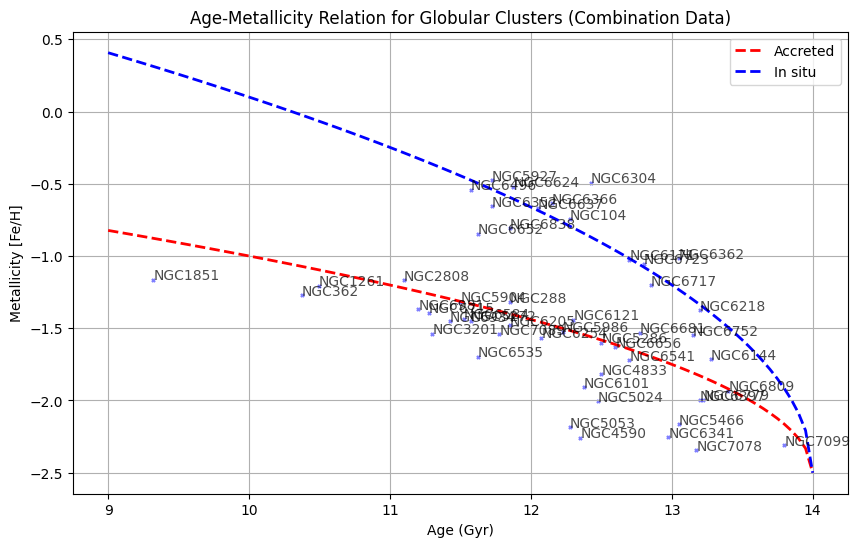

In [9]:
# Extract columns for plotting
metallicities = merged_metalicities['FeH'].astype(float)
ages = merged_metalicities['Age'].astype(float)
cluster_ids = merged_metalicities['Object']

# Create a scatter plot for Age-Metallicity Relation
plt.figure(figsize=(10, 6))
plt.scatter(ages, metallicities, marker='x', s=5, color='blue', alpha=0.5)

##Create a sqrt function to as a best fit
x = np.linspace(9, 14, 100)  
sqrt_curve = 0.75*np.sqrt(-1*(x - 14 ))  - 2.5  
plt.plot(x, sqrt_curve, 'r--', label='Accreted', linewidth=2)

x = np.linspace(9, 14, 100)  
sqrt_curve = 1.3 *np.sqrt(-1*(x - 14 ))  - 2.5  
plt.plot(x, sqrt_curve, 'r--', label='In situ', linewidth=2, color ='blue')

# Annotate cluster names for reference
for i, id in enumerate(cluster_ids):
    plt.annotate(id, (ages[i], metallicities[i]), fontsize=10, alpha=0.7)

# Labeling and formatting the plot
plt.title("Age-Metallicity Relation for Globular Clusters (Combination Data)")
plt.xlabel("Age (Gyr)")
plt.ylabel("Metallicity [Fe/H]")
# plt.axvline(x=12, color='red', linestyle='--', label="Approximate Age of Milky Way Halo")
plt.legend()
plt.grid(True)

# def sqrt(x):
#    return np.sin(x) + x + x * np.sin(x)

# x = np.linspace(-10, 10, 100)

# plt.plot(x, f(x), color='red')

# plt.show()

# Linear regression
# reg = stats.linregress(ages, metallicities)
# plt.plot(
#     ages, reg.slope * ages + reg.intercept,
#     label=f'y = {reg.slope:.2f} * x + {reg.slope:.2f}'
# )

plt.show()

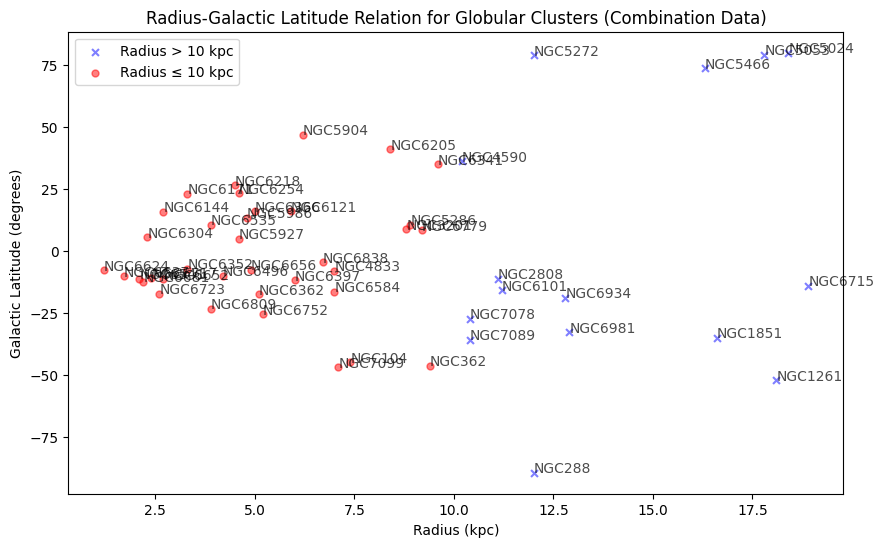

In [10]:
# Extract necessary columns for plotting
radius = np.asarray(merged_metalicities['R_G'].astype(float))
latitude = merged_metalicities['B'].astype(float)
cluster_ids = merged_metalicities['Object']

# Create a scatter plot for Raidus-Galatic Latitude Relation

mask = radius <= 10
plt.figure(figsize=(10, 6))


plt.scatter(radius[~mask], latitude[~mask], marker='x', s=25, color='blue', alpha=0.5, label='Radius > 10 kpc')
plt.scatter(radius[mask], latitude[mask], marker='o', s=25, color='red', alpha=0.5, label='Radius ≤ 10 kpc')


for i, id in enumerate(cluster_ids):
    plt.annotate(id, (radius[i], latitude[i]), fontsize=10, alpha=0.7)

# Labeling and formatting the plot
plt.title("Radius-Galactic Latitude Relation for Globular Clusters (Combination Data)")
plt.xlabel("Radius (kpc)")
plt.ylabel("Galactic Latitude (degrees)")
# plt.axvline(x=12, color='red', linestyle='--', label="Approximate Age of Milky Way Halo")
plt.legend()
# plt.grid(True)

# Linear regression
# reg = stats.linregress(ages, metallicities)
# plt.plot(
#     ages, reg.slope * ages + reg.intercept,
#     label=f'y = {reg.slope:.2f} * x + {reg.slope:.2f}'
# )

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


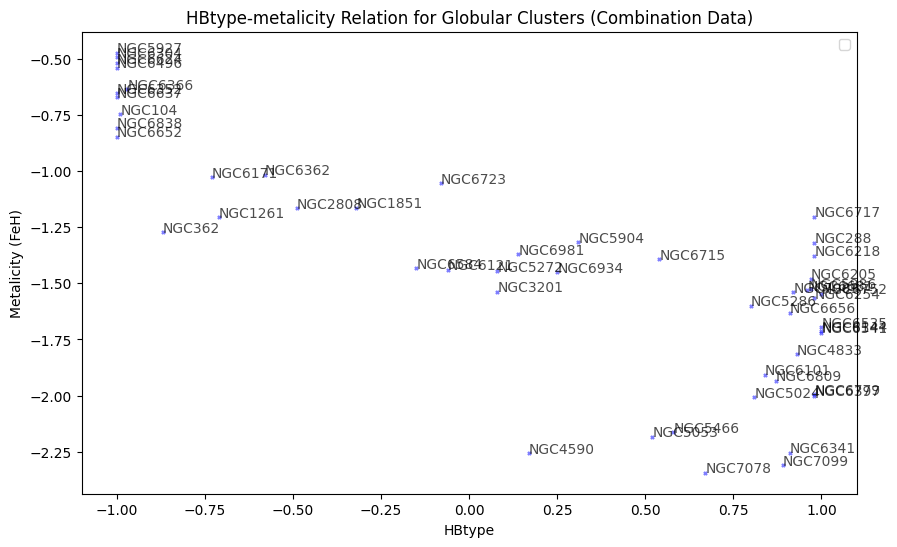

In [35]:
# Extract necessary columns for plotting
radius = merged_metalicities['R_G'].astype(float)
ages = merged_metalicities['Age'].astype(float)
metallicities = merged_metalicities['FeH'].astype(float)
HB_type = merged_metalicities['HBtype'].astype(float)
cluster_ids = merged_metalicities['Object']

# Create a scatter plot for Age-Metallicity Relation
plt.figure(figsize=(10, 6))
plt.scatter(HB_type, metallicities, marker='x', s=5, color='blue', alpha=0.5)

# Annotate cluster names for reference
for i, id in enumerate(cluster_ids):
    # plt.annotate(id, (metallicities[i], ages[i]), fontsize=10, alpha=0.7)
    plt.annotate(id, (HB_type[i], metallicities[i]), fontsize=10, alpha=0.7)

# Labeling and formatting the plot
plt.title("HBtype-metalicity Relation for Globular Clusters (Combination Data)")
plt.xlabel("HBtype")
plt.ylabel("Metalicity (FeH)")
# plt.axvline(x=12, color='red', linestyle='--', label="Approximate Age of Milky Way Halo")
plt.legend()
# plt.grid(True)

# Linear regression
# reg = stats.linregress(ages, metallicities)
# plt.plot(
#     ages, reg.slope * ages + reg.intercept,
#     label=f'y = {reg.slope:.2f} * x + {reg.slope:.2f}'
# )

plt.show()